In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print(df['stroke'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


In [4]:
df_class_1 = df[df['stroke'] == 1]
number_class_1 = len(df_class_1)
df_class_0 = df[df['stroke'] == 0].sample(number_class_1)

final_df = pd.concat([df_class_1,
                         	df_class_0])

print(final_df.shape)

(498, 12)


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 498 non-null    int64  
 1   gender             498 non-null    object 
 2   age                498 non-null    float64
 3   hypertension       498 non-null    int64  
 4   heart_disease      498 non-null    int64  
 5   ever_married       498 non-null    object 
 6   work_type          498 non-null    object 
 7   Residence_type     498 non-null    object 
 8   avg_glucose_level  498 non-null    float64
 9   bmi                449 non-null    float64
 10  smoking_status     498 non-null    object 
 11  stroke             498 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 50.6+ KB


In [6]:
#Data manipulation untuk tipe data object supaya mudah untuk dilakukan manipulation
final_df['gender'] = final_df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
final_df['ever_married'] = final_df['ever_married'].map({'No': 0, 'Yes': 1})
final_df['Residence_type'] = final_df['Residence_type'].map({'Rural': 0, 'Urban': 1})
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 498 non-null    int64  
 1   gender             498 non-null    int64  
 2   age                498 non-null    float64
 3   hypertension       498 non-null    int64  
 4   heart_disease      498 non-null    int64  
 5   ever_married       498 non-null    int64  
 6   work_type          498 non-null    object 
 7   Residence_type     498 non-null    int64  
 8   avg_glucose_level  498 non-null    float64
 9   bmi                449 non-null    float64
 10  smoking_status     498 non-null    object 
 11  stroke             498 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 50.6+ KB


In [7]:
#Cek apakah ada data null
print(final_df.isnull().sum())

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  49
smoking_status        0
stroke                0
dtype: int64


In [8]:
# Manipulate data yang null dengan mean 
final_df.fillna(final_df.mean(numeric_only=True), inplace=True)

# Untuk kolom yang tipe datanya object, diisi dengan data yang sering muncul (median)
for col in final_df.select_dtypes(include='object'):
    final_df[col].fillna(final_df[col].mode()[0], inplace=True)

final_df.head()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_17824\2595137788.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(final_df[col].mode()[0], inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,29.53608,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 5054
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 498 non-null    int64  
 1   gender             498 non-null    int64  
 2   age                498 non-null    float64
 3   hypertension       498 non-null    int64  
 4   heart_disease      498 non-null    int64  
 5   ever_married       498 non-null    int64  
 6   work_type          498 non-null    object 
 7   Residence_type     498 non-null    int64  
 8   avg_glucose_level  498 non-null    float64
 9   bmi                498 non-null    float64
 10  smoking_status     498 non-null    object 
 11  stroke             498 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 50.6+ KB


In [10]:
#Ubah data yang tipe object 
final_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
# Buat dictionary untuk mapping
work_type_mapping = {
    'Private': 1,
    'Self-employed': 2,
    'Govt_job': 3,
    'children': 4,
    'Never_worked': 5
}

# Terapkan mapping ke kolom work_type
final_df['work_type'] = final_df['work_type'].map(work_type_mapping)


In [12]:
#Ubah data smoking status yang tipe object 
final_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
# Langkah 1: Hitung modus dari 3 kategori valid (tidak termasuk 'Unknown')
valid_smoking = final_df[final_df['smoking_status'] != 'Unknown']['smoking_status']
most_common = valid_smoking.mode()[0]

# Ganti 'Unknown' dengan nilai modus
final_df['smoking_status'] = final_df['smoking_status'].replace('Unknown', most_common)

# Langkah 2: Mapping manual ke angka
smoking_mapping = {
    'formerly smoked': 1,
    'never smoked': 2,
    'smokes': 3
}

final_df['smoking_status'] = final_df['smoking_status'].map(smoking_mapping)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = final_df.drop('stroke', axis=1)
normalized_X = scaler.fit_transform(X)

In [15]:
#Split Train, Test 
from sklearn.model_selection import train_test_split

y = final_df['stroke']
r_state_1 = 2023
t_size_1 = 0.33

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,
                                                	test_size=t_size_1,
                                                	random_state=r_state_1,
                                                	stratify=y)

In [16]:
from sklearn.impute import SimpleImputer

# Just impute everything (assuming X_train has only numeric data now)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
#Random Forest Modeling

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
random_forest_model = RandomForestClassifier()
# Fit the random search object to the data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
#Hasil akurasi menggunakan randomforest
from sklearn.metrics import accuracy_score,classification_report
y_pred = random_forest_model.predict(X_test)

# Get the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7515151515151515
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        82
           1       0.76      0.73      0.75        83

    accuracy                           0.75       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.75      0.75      0.75       165



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict menggunakan conf matrix
y_pred = random_forest_model.predict(X_test)
cm_randomforest = confusion_matrix(y_test, y_pred)

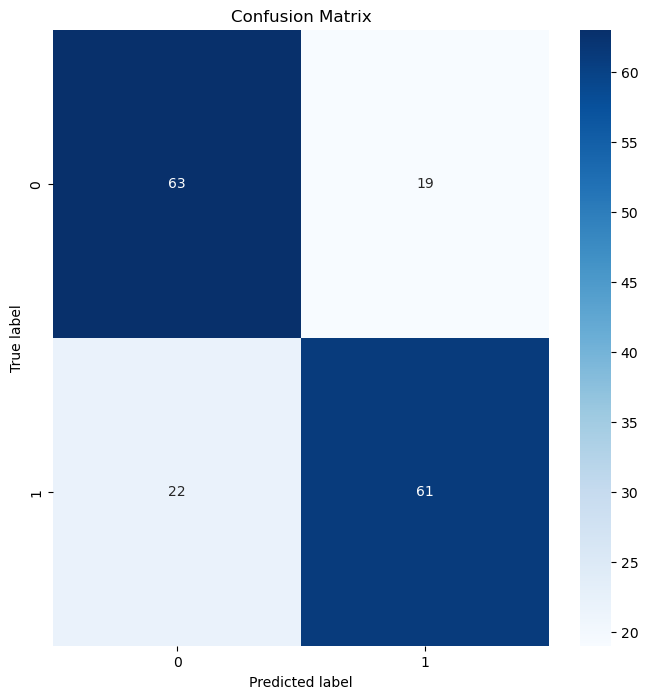

In [21]:
import matplotlib.pyplot as plt
# Tampilkan Conf Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_randomforest, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
# Hasil akurasi menggunakan random forest 
# Untuk meningkatkan akurasinya, karena datanya inbalance bisa lakukan balancing data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = final_df.drop('stroke', axis=1)
normalized_X = scaler.fit_transform(X)
y = final_df['stroke']

In [24]:
#Modeling menggunakan logisitc regression
from sklearn.linear_model import LogisticRegression

r_state_2 = 870
t_size_2 = 0.52

X_train, X_val, y_train, y_val = train_test_split(
                                            	normalized_X, y,
                                            	test_size=t_size_2,
                                            	random_state=r_state_2)

In [25]:
X_val = pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_val, y_val)

# Evaluasi model di test set
lr_model.score(X_test, y_test)

0.7333333333333333

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
# Predict menggunakan conf matrix
y_pred = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        82
           1       0.72      0.77      0.74        83

    accuracy                           0.73       165
   macro avg       0.73      0.73      0.73       165
weighted avg       0.73      0.73      0.73       165



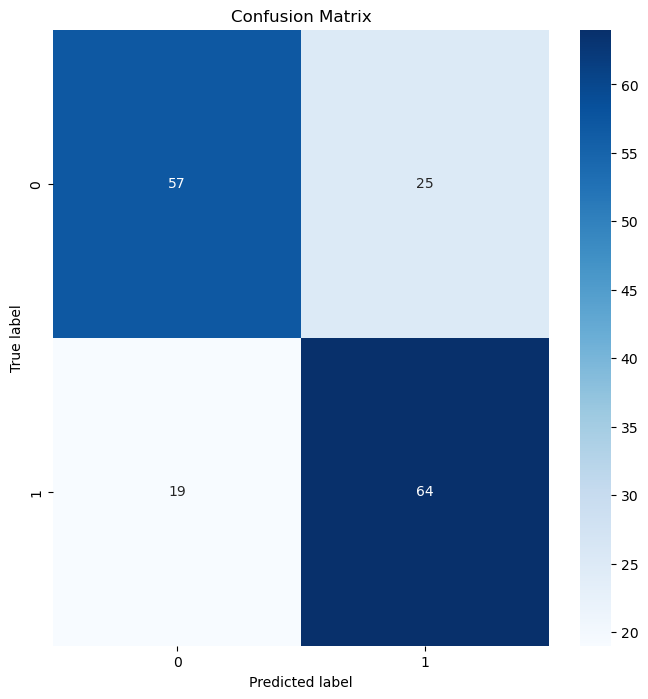

In [28]:
import matplotlib.pyplot as plt
# Tampilkan Conf Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
## Using Deep Learning Models

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = final_df.drop('stroke', axis=1)
normalized_X = scaler.fit_transform(X)
y = final_df['stroke']

In [31]:
#Import DL 
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.15, shuffle=True, random_state=12)

In [32]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(30, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

print (model.summary())

C:\Users\Tobias\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           1,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,221 (16.49 KB)

 Trainable params: 4,221 (16.49 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.3, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5065 - loss: 0.6901 - val_accuracy: 0.5984 - val_loss: 0.6762
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5423 - loss: 0.6872 - val_accuracy: 0.6142 - val_loss: 0.6660
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5345 - loss: 0.6828 - val_accuracy: 0.5827 - val_loss: 0.6503
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 0.6579 - val_accuracy: 0.6772 - val_loss: 0.6365
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6761 - loss: 0.6536 - val_accuracy: 0.7008 - val_loss: 0.6262
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7154 - loss: 0.6233 - val_accuracy: 0.7008 - val_loss: 0.6161
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7502 - loss: 0.6010 - val_accuracy: 0.6929 - val_loss: 0.6093
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6721 - loss: 0.6169 - val_accuracy: 0.6929 - val_loss

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Model accuracy: %.2f"% (accuracy * 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7155 - loss: 0.6482
Model accuracy: 72.00


In [36]:
model_seq = Sequential()
model_seq.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dense(64, activation="relu"))
model_seq.add(Dropout(0.30))
model_seq.add(Dense(64, activation="relu"))
model_seq.add(Dense(8, activation="relu"))
model_seq.add(Dense(1, activation="sigmoid"))

In [37]:
#Compile model
model_seq.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
history = model_seq.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.40, verbose=1)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5396 - loss: 0.6935 - val_accuracy: 0.6529 - val_loss: 0.6695
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6329 - loss: 0.6722 - val_accuracy: 0.6706 - val_loss: 0.6501
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6528 - loss: 0.6544 - val_accuracy: 0.7059 - val_loss: 0.6324
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6433 - loss: 0.6387 - val_accuracy: 0.7000 - val_loss: 0.6205
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6438 - loss: 0.6363 - val_accuracy: 0.7059 - val_loss: 0.6113
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6374 - loss: 0.6154 - val_accuracy: 0.7059 - val_loss: 0.6050
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6474 - loss: 0.5873 - val_accuracy: 0.7118 - val_loss: 0.6026
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6685 - loss: 0.5888 - val_accuracy: 0.6824 - val_loss

In [39]:
loss, accuracy = model_seq.evaluate(X_test, y_test)

print("Model accuracy: %.2f"% (accuracy * 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8102 - loss: 0.4078 
Model accuracy: 80.00


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


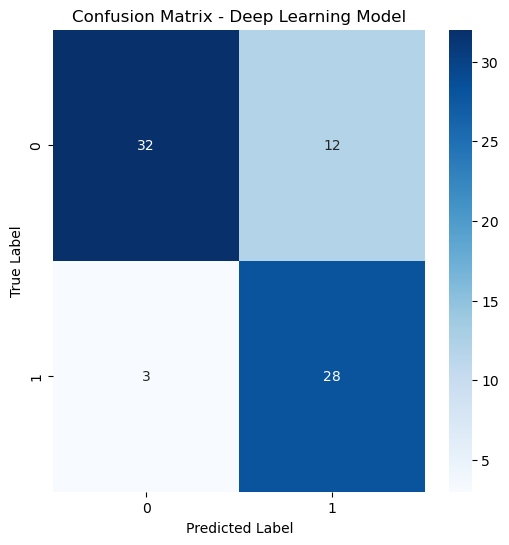

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict menggunakan conf matrix
# Prediksi probabilitas
y_pred_prob = model_seq.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Buat confusion matrix
cm_seq = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dengan heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_seq, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Deep Learning Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()